# 第5章 分類1:アヤメの判別

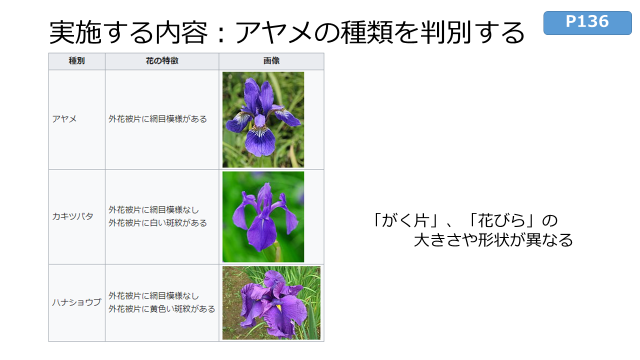

引用元：https://ja.wikipedia.org/wiki/%E3%82%A2%E3%83%A4%E3%83%A1

# 5.2 データの前処理

## CSVファイルの読み込み

コード5-1 データフレームの作成(P139)

In [ ]:
# pandasのインポート
import pandas as pd

# 'iris.csv'を読み込んで、データフレームに変換する
df = pd.read_csv('iris.csv')

# dfの先頭3行を表示する
df.head(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa


▶実行結果  
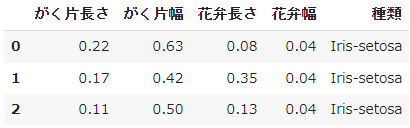

## データの中身の確認

### 正解データの確認

**その列にある【データの種類】を取得する**  
df[列名]**.unique()**

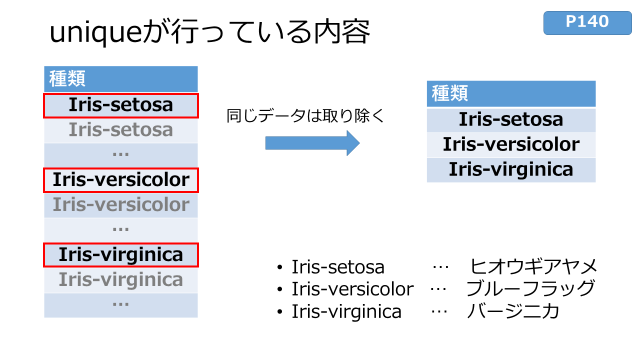

コード5-2 uniqueメソッドで種類列の値を確認(P140)

In [ ]:
# 種類列の値を重複を除いて取得し、表示する
df['種類'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

▶実行結果  
array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


## データごとの出現回数のカウント ★

**その列の【データの種類ごとの出現回数】を取得する**  
df[列名]**.value_counts()**

「**正解データに偏りが無いか**」というのは、重要な確認ポイント！

コード5-4 value_counts メソッドでデータの出現回数をカウント(P141)

In [ ]:
# 種類列のデータごと(種類ごと)の出現回数を取得する
df['種類'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 種類, dtype: int64

▶実行結果  
Iris-setosa        50  
Iris-versicolor    50  
Iris-virginica     50  
Name: 種類, dtype: int64

**問1**  
以下のデータで、「血液型」列のデータの種類とそれぞれの出現回数を答えてください。

|献血者ID|血液型|
| :----: | :----: |
| 101 | A |
| 103 | O |
| 104 | A |
| 105 | AB |
| 105 | AB |

**解答欄**

データの種類1：A:2回  
データの種類2：O:1回  
データの種類3：AB:2回  
…必要な数だけ記載すること

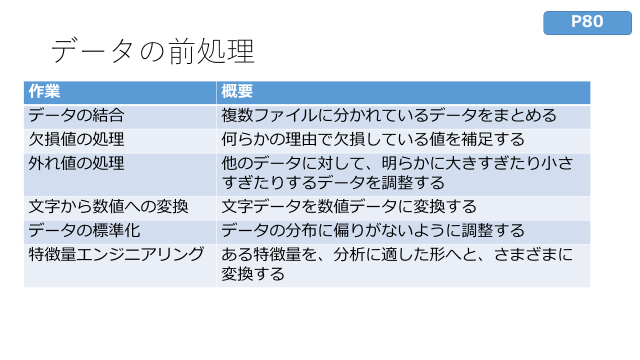

欠損値があると、モデルに学習をさせることはできない！

## 欠損値の確認

**列ごとの【欠損値の有無】を調べる**  
df**.isnull().any(axis=1)**

**axis**
* 0('index')：Any Index どこかの行にTrueがあるか？を調べる
* 1('column')：Any Column どこかの列にTrueがあるか？を調べる

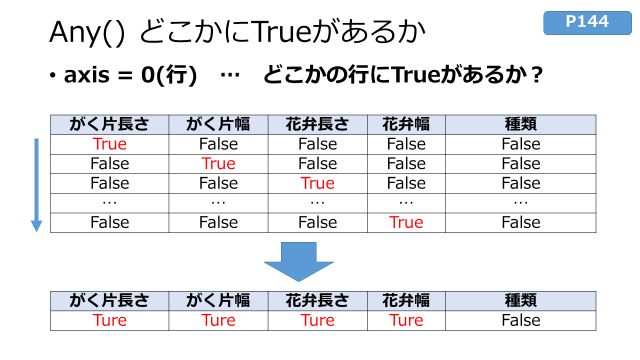

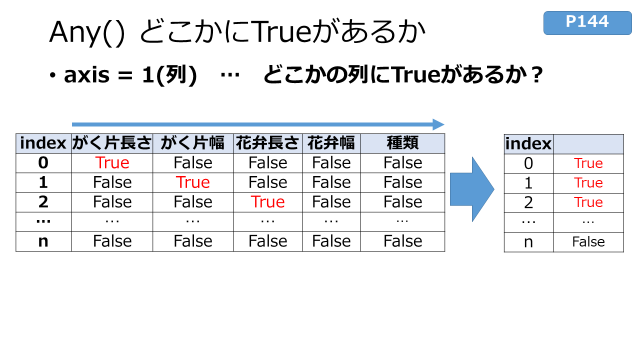

コード5-7 anyメソッドにより列単位で欠損値を確認(P144)

In [ ]:
# どこかの行に欠損値が存在するかを調べる
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

▶実行結果  
がく片長さ     True  
がく片幅      True  
花弁長さ      True  
花弁幅       True  
種類       False  
dtype: bool

**列ごとの【欠損値の数】を調べる**  
df**.isnull().sum(axis=0)**

**axis**
* 0('index')：行の値を合計する
* 1('column')：列の値を合計する

**PythonではFalseは0、Trueは1と扱って計算される**

コード5-9 isnull メソッドとsum メソッドで各列の欠損値の数を求める(P145)

In [ ]:
# 各列に欠損値がいくつあるか集計
df.isnull().sum(axis=0)

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

▶実行結果  
がく片長さ    2  
がく片幅     1  
花弁長さ     2  
花弁幅      2  
種類       0  
dtype: int64

**問2**  
以下の計算式の結果を答えてください。

(1)True + True  
(2)100 * False


**解答欄**

* (1) 2
* (2) 0

## 欠損値を含む行または列の削除

**欠損値を含む行/列を削除する**  
df**.dropna(how=●, axis=▲, inplace=■)**

**how**
* any:一部でも欠損値なら削除
* all：すべて欠損値なら削除

**axis**
* 0('index')：行を削除
* 1('column')：列を削除

**inplace**
* True：データフレームを**変更する**
* False：データフレームを**変更しない** **※デフォルトの動作**

コード5-10 dropna メソッドで欠損値を含む行/列を削除する(P147)

In [ ]:
# dfで、欠損値が1つでも含まれている行を削除し、結果をdf2に代入する。(もとのデータフレームを変更しない)
df2 = df.dropna(how='any', axis=0, inplace= False)

# df2の末尾3行を表示し、欠損値が含まれている147行目が削除されていることを確認する
df2.tail(3) 

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
146,0.56,0.21,0.69,0.46,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


▶実行結果  
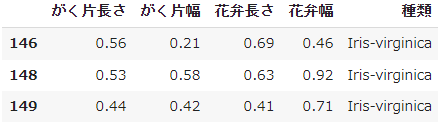

コード5-11 削減元のデータフレームを確認(P147)

In [ ]:
# dfの欠損値の有無（True/False）を表示し、欠損値が削除されていないことを確認する
# any(axis = 0) でも可能
df.isnull().any()

▶実行結果  
がく片長さ     True  
がく片幅      True  
花弁長さ      True  
花弁幅       True  
種類       False  
dtype: bool

**問3**  
元のデータフレームを直接変更し、欠損値を削除する

In [ ]:
# dfで、欠損値が1つでも含まれている行を削除する。(もとのデータフレームを変更する)
df.dropna(how = 'any', axis = 0, inplace = True)

# dfの欠損値の有無（True/False）を表示し、欠損値が削除されていることを確認する
# any(axis = 0) でも可能
df.isnull().any()

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

▶実行結果  
がく片長さ    False  
がく片幅     False  
花弁長さ     False  
花弁幅      False  
種類       False  
dtype: bool

コード5-X1 csvファイルを読み込み直す

In [ ]:
# 上記でデータフレームを変更したため、'iris.csv'を読み込み、dfに代入しなおす
df = pd.read_csv('iris.csv')

# dfの形状（行数、列数）を表示する
df.shape

(150, 5)

▶実行結果  
(150, 5)

## 欠損値の穴埋め P149～

**欠損値を別の値に置き換える**  
df[列名]**.fillna(●, inplace=▲)**  
df**.fillna(●, inplace=▲)**  

**inplace**
* True：データフレームを**変更する**
* False：データフレームを**変更しない** **※デフォルトの動作**

コード5-12 fillna メソッドで欠損値を指定した値に置き換える(P149)

In [ ]:
# dfの「花弁長さ」列の欠損値を0で穴埋めした結果を取得し、結果をdfの「花弁長さ」列に代入する
df['花弁長さ'] = df['花弁長さ'].fillna(0)


# dfの末尾3行を表示し、欠損値が穴埋めされていることを確認する(インデックス147の花弁長さ)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


▶実行結果  
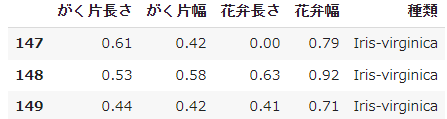

**問4**  
(1) dfの欠損値の有無（True/False）を表示し、欠損値があることを確認してください

In [ ]:
# dfの欠損値の有無（True/False）を表示し、欠損値があることを確認する
# any(axis = 0) でも可能
df.isnull().any()

がく片長さ     True
がく片幅      True
花弁長さ     False
花弁幅       True
種類       False
dtype: bool

▶実行結果  
がく片長さ     True  
がく片幅      True  
花弁長さ     False  
花弁幅       True  
種類       False  
dtype: bool

(2) dfの欠損値を全て0で置き換え、結果をdf3に代入する

In [ ]:
# dfの欠損値を全て0で置き換え、df3に代入する
df3 = df.fillna(0)

# df3の欠損値の有無（True/False）を表示し、欠損値が無いことを確認する
# any(axis = 0) でも可能
df3.isnull().any()

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

▶実行結果  
がく片長さ    False  
がく片幅     False  
花弁長さ     False  
花弁幅      False  
種類       False  
dtype: bool

### 代表値の計算

穴埋めするべき値は列ごとに適切な値を考える
* 数値　…　平均値、中央値　を使うことが多い
* 文字列　…　最頻値　を使うことが多い

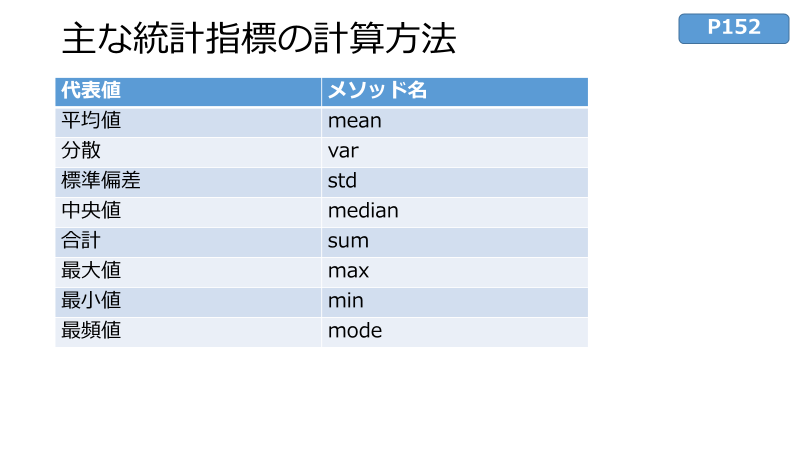

例）各列の平均値を求める場合  
df.mean()　※文字列の列は自動的に除外してくれる

コード5-13 mean メソッドで数値の列の平均値を計算(P151)

In [ ]:
# dfの全列（数値列）の平均値を計算
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.480267
花弁幅      0.447432
dtype: float64

▶実行結果  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.  
  
がく片長さ    0.420878  
がく片幅     0.440403  
花弁長さ     0.480267  
花弁幅      0.447432  
dtype: float64

コード5-14 特定の列だけを計算する(P151)

In [ ]:
# dfのがく片長さ列の平均値を計算
df['がく片長さ'].mean()

0.42087837837837844

▶実行結果  
0.42087837837837844

コード5-15 標準偏差の計算(P152)

In [ ]:
# dfの全列（数値列）の標準偏差
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


がく片長さ    0.228910
がく片幅     0.181137
花弁長さ     0.236909
花弁幅      0.309960
dtype: float64

▶実行結果  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.  
がく片長さ    0.228910  
がく片幅     0.181137  
花弁長さ     0.236909  
花弁幅      0.309960  
dtype: float64

コード5-16 平均値を求めてデータフレームの欠損値と置き換える(P152)

In [ ]:
# 5-12でdfの欠損値を0に書き換えたため、再度'iris.csv'を読み込んでデータフレームに変換する
df = pd.read_csv('iris.csv')

# dfの各列の平均値で欠損値を穴埋めした結果を取得し、df2に代入する
df2 = df.fillna(df.mean())

# df2の各列の欠損値の有無(True/False)を表示する
# any(axis = 0) でも可能
df2.isnull().any()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

▶実行結果  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.  
  
がく片長さ    False  
がく片幅     False  
花弁長さ     False  
花弁幅      False  
種類       False  
dtype: bool

## 特徴量と正解データの取り出し

コード5-17 特徴量と正解データを変数に代入(P154)

In [ ]:
# df2から特徴量(がく片長さ, がく片幅, 花弁長さ, 花弁幅)を取り出して、変数xに代入する
# x = df2[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']]
x = df2.iloc[:, 0:4]


# df2から正解データ(種類)を取り出して、変数tに代入する
# t = df2['種類']
t = df2.iloc[:, -1]

# 変数xの先頭5行を表示する
print('===特徴量===')
print(x.head())

# 変数tの先頭5行を表示する
print('==正解データ===')
print(t.head())

===特徴量===
   がく片長さ  がく片幅  花弁長さ   花弁幅
0   0.22  0.63  0.08  0.04
1   0.17  0.42  0.35  0.04
2   0.11  0.50  0.13  0.04
3   0.08  0.46  0.26  0.04
4   0.19  0.67  0.44  0.04
==正解データ===
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 種類, dtype: object


▶実行結果  
===特徴量===  
   がく片長さ  がく片幅  花弁長さ   花弁幅  
0   0.22  0.63  0.08  0.04  
1   0.17  0.42  0.35  0.04  
2   0.11  0.50  0.13  0.04  
3   0.08  0.46  0.26  0.04  
4   0.19  0.67  0.44  0.04  
===正解データ===  
0    Iris-setosa  
1    Iris-setosa  
2    Iris-setosa  
3    Iris-setosa  
4    Iris-setosa  
Name: 種類, dtype: object

# 5.3 モデルの作成と学習

## 決定木モデル

**解説は別紙参照**

## 決定木モデルの作成と学習

**決定木モデル(分類)を使用する**  
* treeモジュールをインポートする  
 from sklearn import tree  


* 決定木モデルのオブジェクトを生成する  
 tree.DecisionTreeClassifier(**max_depth = ●**, random_state = ▲)  
   * **max_depth**  
    木の深さの最大値



深さを深くする=細かく分類する **正解しやすくなるが過学習につながる**  
乱数シードを固定して、同じデータで学習したら同じ学習結果にする


コード5-18 決定木モデルを作成する(P161)

コード5-19 モデルの学習と正解率の計算(P162)

In [ ]:
# treeモジュールのインポート
from sklearn import tree
# __空欄__

# 決定木を生成する
# * 深さは2とする
# * 乱数シードは0とする
model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)

# 特徴量xと正解データtを使って学習する
model.fit(x, t)

# 特徴量xと正解データtでの正解率を表示する
model.score(x, t)

0.94

▶実行結果  
0.94

# 5.4 モデルの評価

学習時に使ったことのない**未知のデータ**でも正しい答えを出せてこそ、性能が良いといえる

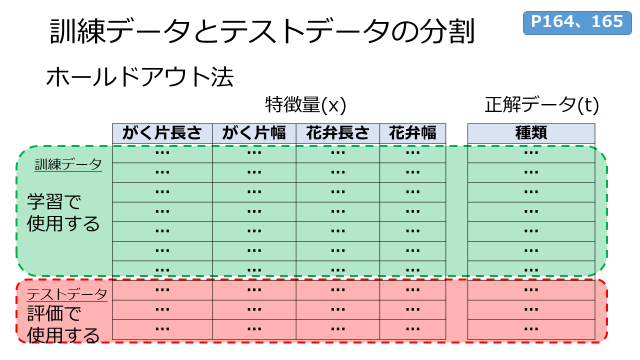

テストデータの目安は全体の20～30%くらい

**データを分割する**
* 関数をインポートする  
 **from sklearn.model_selection import train_test_split**  


* 分割する  
 **train_test_split(分割するデータ, test_size=●, random_state=▲)**  
  * **test_size**  
    テストデータの割合(0～1)
  * **random_state**  
    乱数シード。値を指定し、**同じデータを分割したら同じ結果になる**ようにする。

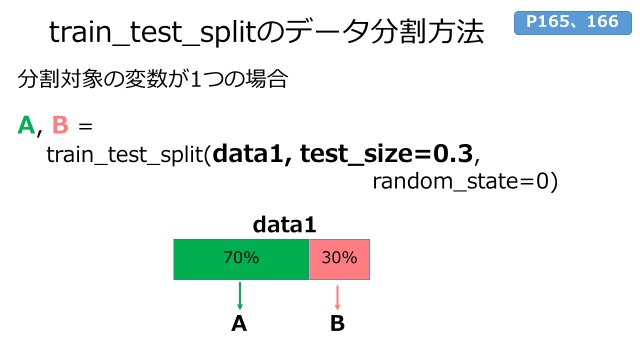

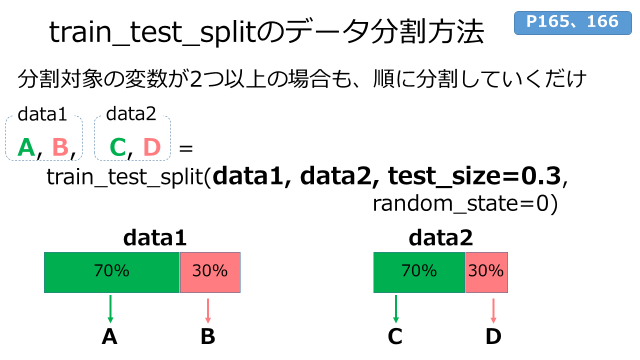

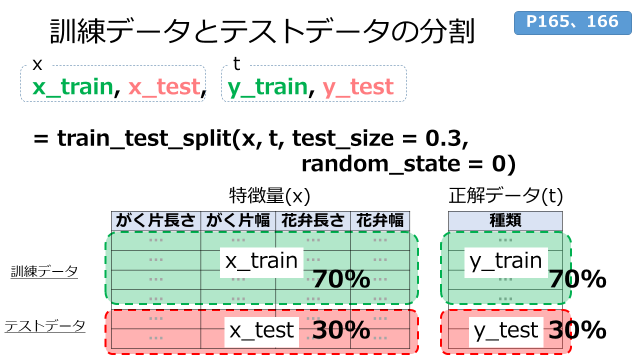

コード5-20 訓練データとテストデータに分割する(P165) ★

In [ ]:
# train_test_splitのインポート
from sklearn.model_selection import train_test_split

# 特徴量xと正解データtのそれぞれを、「学習で用いるデータ」と「テストで用いるデータ」に分ける
# * テストデータに使用する割合を『30%』、乱数シードは0とする
# * 「学習で用いるデータ」の特徴量を変数x_trainに代入する
# * 「テストで用いるデータ」の特徴量を変数x_testに代入する
# * 「学習で用いるデータ」の正解データを変数y_trainに代入する
# * 「テストで用いるデータ」の正解データを変数y_testに代入する
x_train, x_test, y_train, y_test =  train_test_split(x, t, test_size = 0.3, random_state = 0)

コード5-21 train_test_split関数の結果を確認(P167)

In [ ]:
# xの行数、列数を表示
print('もとの行数、列数')
print(x.shape)

# x_trainの行数、列数を表示
print('訓練データの行数、列数')
print(x_train.shape)

# x_testの行数、列数を表示
print('テストデータの行数、列数')
print(x_test.shape)

もとの行数、列数
(150, 4)
訓練データの行数、列数
(105, 4)
テストデータの行数、列数
(45, 4)


▶実行結果  
もとの行数、列数  
(150, 4)  
訓練データの行数、列数  
(105, 4)  
テストデータの行数、列数  
(45, 4)

コード5-22 訓練データでの学習と正解率の計算(P168)

In [ ]:
# 訓練データ(特徴量x_trainと正解データy_train)を使って学習する
model.fit(x_train, y_train)

# テストデータ(特徴量x_testと正解データy_test)の正解率を表示する
model.score(x_test, y_test)

0.9555555555555556

▶実行結果  
0.9555555555555556



---



(参考)**分割時に、正解データの種類の割合通りに分割する**  
train_test_split(**stratify=t**)

コード5-X2 分割した結果で、データの種類に偏りがないかを確認する

In [ ]:
# y_trainのデータ種類ごとの出現回数を表示する
print('訓練データ')
print(y_train.value_counts())

# y_testのデータ種類ごとの出現回数を表示する
print('テストデータ')
print(y_test.value_counts())

訓練データ
Iris-virginica     39
Iris-setosa        34
Iris-versicolor    32
Name: 種類, dtype: int64
テストデータ
Iris-versicolor    18
Iris-setosa        16
Iris-virginica     11
Name: 種類, dtype: int64


コード5-X3 分割時に、正解データの種類の割合通りに分割する

In [ ]:
# 正解データの種類の割合通りに分割する
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, t, test_size = 0.3, random_state = 0, stratify=t)

# y_train2のデータ種類ごとの出現回数を表示する
print('訓練データ')
print(y_train2.value_counts())

# y_test2のデータ種類ごとの出現回数を表示する
print('テストデータ')
print(y_test2.value_counts())

訓練データ
Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: 種類, dtype: int64
テストデータ
Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: 種類, dtype: int64




---



## モデルの保存

コード5-23 モデルを保存する(P169)

In [ ]:
# pickleをインポート
import pickle

# modelを'irismodel.pkl'という名前で保存する
with open('irismodel.pkl', "wb") as f:
    pickle.dump(model, f)

# 5.5 決定木の図の作成 ★

**解説は別紙参照**

### 条件と閾値

**分岐条件を確認する**
* **分岐条件の列を確認する**  
 model**.tree_.feature**  

* **分岐条件のしきい値を確認する**  
 model**.tree_.threshold**  

* 特徴量の列を確認する  
 x.columns

コード5-24 分岐条件の列を決める(P171)

In [ ]:
# 条件分岐の列を確認する
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

▶実行結果  
array([ 3, -2,  3, -2, -2], dtype=int64)

**↑①各ノードの分岐条件に使われている特徴量の列番号**

コード5-25 分岐条件のしきい値を含む配列を返す tree_.threshold(P172)

In [ ]:
# 分岐条件のしきい値を確認する
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

▶実行結果  
array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

**↑②分岐条件の閾値**

コード5-X4 特徴量xの列を表示する

In [ ]:
# xの列名を取得し、表示する
x.columns

Index(['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅'], dtype='object')

▶実行結果  
Index(['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅'], dtype='object')

**↑③特徴量の列**

**問5**  
ここまでの3つの情報を使って分岐条件を確認してください
* 最初の分岐条件の内容は [花弁幅 ≦ 0.275] を示している  
* 次（左下のノード）は [分類結果] を示している


### グループと分類の対応

**分類結果が示す種類を確認する**
* **分類結果(リーフ)に到達したデータ数を確認する**  
 model**.tree_.value[インデックス]**  

* **種類とグループの対応を確認する**  
 model**.classes_**  


コード5-26 リーフに到達したデータの数を返す tree_.value(P173)

In [ ]:
# ノード番号1での各分類のデータ数
print('ノード番号1')
print(model.tree_.value[1])

# ノード番号3での各分類のデータ数
print('ノード番号3')
print(model.tree_.value[3])

# ノード番号4での各分類のデータ数
print('ノード番号4')
print(model.tree_.value[4])

ノード番号1
[[34.  0.  0.]]
ノード番号3
[[ 0. 31.  6.]]
ノード番号4
[[ 0.  1. 33.]]


▶実行結果  
ノード番号1  
[[34.  0.  0.]]  
ノード番号3  
[[ 0. 31.  6.]]  
ノード番号4  
[[ 0.  1. 33.]]

コード5-27 classes_ でアヤメの種類とグループ番号の対応を調べる(P174)

In [ ]:
# 各グループが何を示すのかを表示する
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

▶実行結果  
array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


**問6**  
ここまでの2つの情報を使って分類結果を確認してください

ノード番号1の分類結果はIris-setosaを指す
ノード番号3の分類結果はIris-versicolorを指す
ノード番号4の分類結果はIris-virginicaを指す

### 決定木の描画関数

コード5-28 plot_tree関数で簡単に決定木を描画する(P175)

[Text(0.4, 0.8333333333333334, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

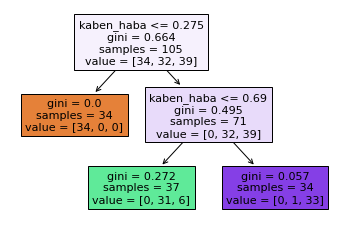

In [ ]:
# 描画関数の仕様上、和名の特徴量を英字に直す
x_train.columns = ['gaku_nagasa', 'gaku_haba', 'kaben_nagasa','kaben_haba']

# 描画関数の利用
from sklearn.tree import plot_tree

# plot_tree関数で決定木を描画
plot_tree(model, feature_names = x_train.columns, filled = True)

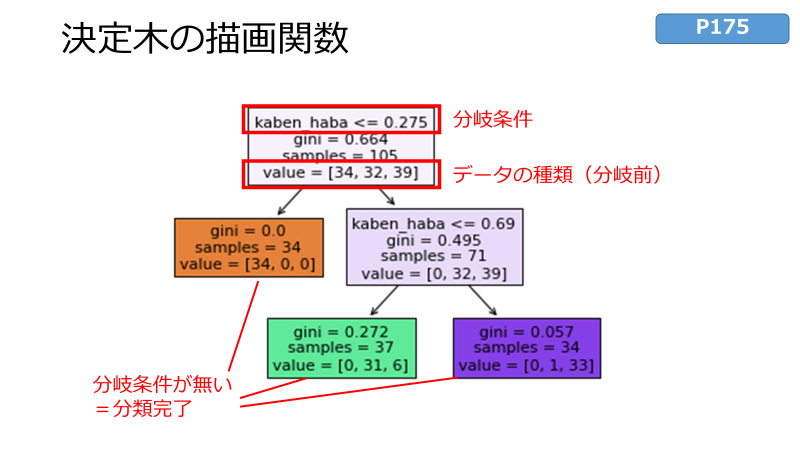

**問7** ここまでの3つの情報を使って分岐条件を確認してください
* 最初の分岐条件の内容は「花弁幅 ≦ 0.275」を示している
* 次の分岐条件（右下のノード）は 「花弁幅 ≦ 0.69」 を示している